In [336]:
import numpy as np
import pandas as pd
import sys
import os
import importlib

sys.path.append(os.path.abspath("../base"))
import classify
import features
pd.set_option("display.max_columns", None)

In [337]:
importlib.reload(classify)  # Reload the classify module
importlib.reload(features)

<module 'features' from '/Users/kevinwong/Library/CloudStorage/GoogleDrive-kew024@ucsd.edu/My Drive/UCSD Winter Quarter 2025/dsc180b/dsc180b-capstone-q2/src/base/features.py'>

In [338]:
categories, consumer, acct, transactions = features.get_datasets()
transaction_categories = features.get_transaction_categories(transactions, categories)
all_features = features.one_hot_accounts(acct, consumer)
all_features = features.get_total_transactions(all_features, transaction_categories)

In [301]:
all_features = features.get_categorical_features2(
    all_features, transaction_categories, acct
)

In [302]:
all_features.to_csv('../../data_q2/features.csv', index = False)

In [339]:
all_features = pd.read_csv("../../data_q2/features.csv")
na_consumers = consumer[consumer["DQ_TARGET"].isna()]["prism_consumer_id"].astype(int)
all_features = all_features[~all_features["prism_consumer_id"].isin(na_consumers)]
all_features = all_features.set_index('prism_consumer_id')
all_features = all_features[all_features['transactions'] > 1]


LightGBM Results
ROC-AUC: 0.820 | Accuracy: 0.907
Training Time: 4.1s | Predicting Time: 0.000026s
              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95      1818
         1.0       0.49      0.13      0.21       185

    accuracy                           0.91      2003
   macro avg       0.70      0.56      0.58      2003
weighted avg       0.88      0.91      0.88      2003



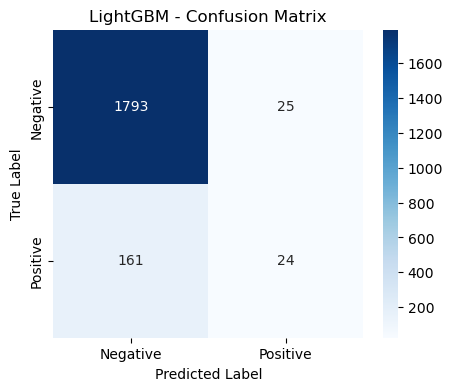


XGBoost Results
ROC-AUC: 0.810 | Accuracy: 0.903
Training Time: 4.8s | Predicting Time: 0.000016s
              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95      1818
         1.0       0.42      0.15      0.22       185

    accuracy                           0.90      2003
   macro avg       0.67      0.57      0.59      2003
weighted avg       0.87      0.90      0.88      2003



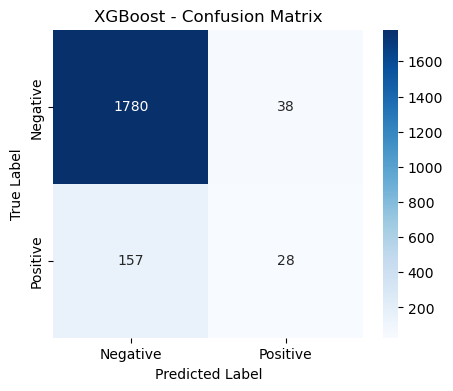


CatBoost Results
ROC-AUC: 0.815 | Accuracy: 0.899
Training Time: 8.1s | Predicting Time: 0.000010s
              precision    recall  f1-score   support

         0.0       0.92      0.97      0.95      1818
         1.0       0.40      0.19      0.26       185

    accuracy                           0.90      2003
   macro avg       0.66      0.58      0.60      2003
weighted avg       0.87      0.90      0.88      2003



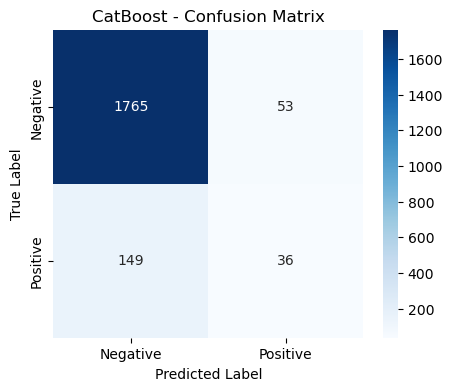


Ensemble model saved as 'WeightedEnsemble.joblib'

Ensemble Model Results
ROC-AUC: 0.821 | Accuracy: 0.910
Precision: 0.885 | Recall: 0.910 | F1-score: 0.886
              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95      1818
         1.0       0.54      0.16      0.24       185

    accuracy                           0.91      2003
   macro avg       0.73      0.57      0.60      2003
weighted avg       0.88      0.91      0.89      2003


======================================== FINAL RESULTS ========================================
            model  roc_auc  accuracy  precision   recall  f1-score  train_time  predict_time
Weighted Ensemble 0.821461  0.909636   0.884592 0.909636  0.886442         NaN           NaN
         LightGBM 0.819511  0.907139   0.878092 0.907139  0.881828    4.050613      0.000026
         CatBoost 0.815184  0.899151   0.874341 0.899151  0.882781    8.051056      0.000010
          XGBoost 0.809794  0.902646   0.8732

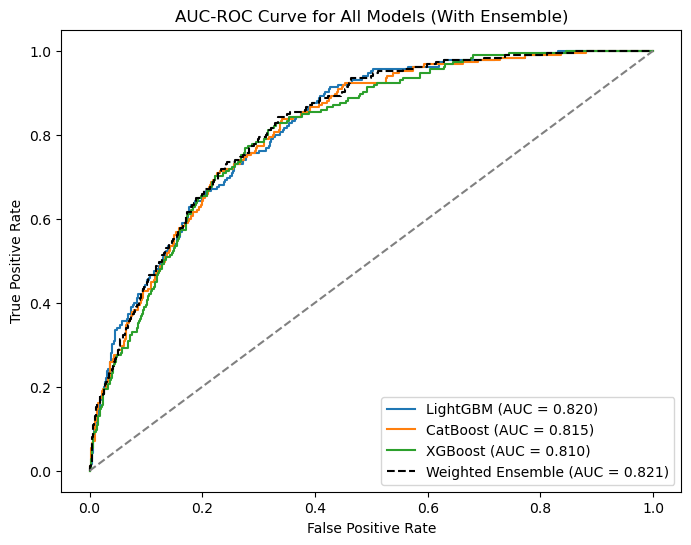

(               model   roc_auc  accuracy  train_time  predict_time  precision  \
 3  Weighted Ensemble  0.821461  0.909636         NaN           NaN   0.884592   
 0           LightGBM  0.819511  0.907139    4.050613      0.000026   0.878092   
 2           CatBoost  0.815184  0.899151    8.051056      0.000010   0.874341   
 1            XGBoost  0.809794  0.902646    4.803254      0.000016   0.873255   
 
      recall  f1-score  support  
 3  0.909636  0.886442      NaN  
 0  0.907139  0.881828   2003.0  
 2  0.899151  0.882781   2003.0  
 1  0.902646  0.881111   2003.0  ,
 {'LightGBM': LGBMClassifier(colsample_bytree=0.8, force_row_wise=True, learning_rate=0.05,
                 n_estimators=200, objective='binary', subsample=0.8, verbose=-1),
  'XGBoost': XGBClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=0.8, device=None, early_stopping_rounds=None,
                enable_cat

In [340]:
classification_features = (
    all_features.drop(columns=["evaluation_date", "DQ_TARGET"])
).columns
classify.run_classification2(classification_features, "DQ_TARGET", all_features)


LightGBM Results
ROC-AUC: 0.820 | Accuracy: 0.907
Training Time: 5.5s | Predicting Time: 0.000031s
              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95      1818
         1.0       0.49      0.13      0.21       185

    accuracy                           0.91      2003
   macro avg       0.70      0.56      0.58      2003
weighted avg       0.88      0.91      0.88      2003



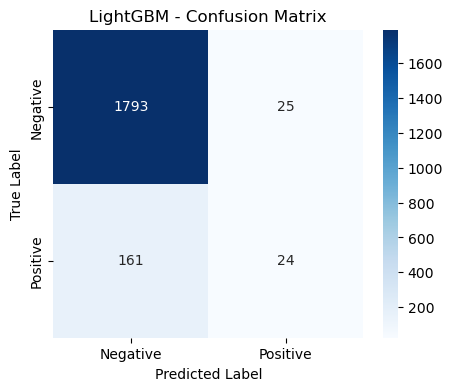


Balanced RF Results
ROC-AUC: 0.807 | Accuracy: 0.907
Training Time: 39.2s | Predicting Time: 0.000065s
              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95      1818
         1.0       0.49      0.16      0.24       185

    accuracy                           0.91      2003
   macro avg       0.71      0.57      0.59      2003
weighted avg       0.88      0.91      0.88      2003



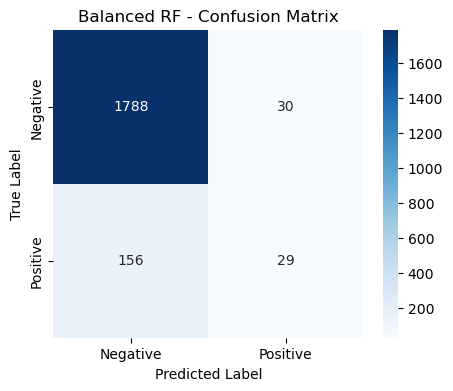


XGBoost Results
ROC-AUC: 0.810 | Accuracy: 0.903
Training Time: 4.7s | Predicting Time: 0.000008s
              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95      1818
         1.0       0.42      0.15      0.22       185

    accuracy                           0.90      2003
   macro avg       0.67      0.57      0.59      2003
weighted avg       0.87      0.90      0.88      2003



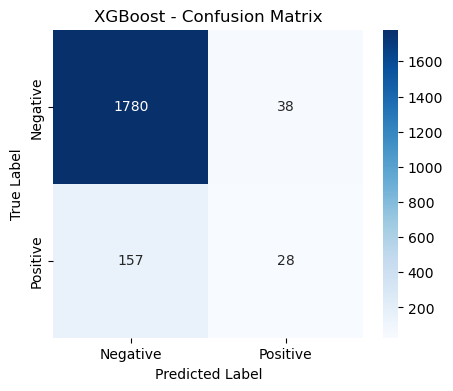


CatBoost Results
ROC-AUC: 0.815 | Accuracy: 0.899
Training Time: 7.8s | Predicting Time: 0.000009s
              precision    recall  f1-score   support

         0.0       0.92      0.97      0.95      1818
         1.0       0.40      0.19      0.26       185

    accuracy                           0.90      2003
   macro avg       0.66      0.58      0.60      2003
weighted avg       0.87      0.90      0.88      2003



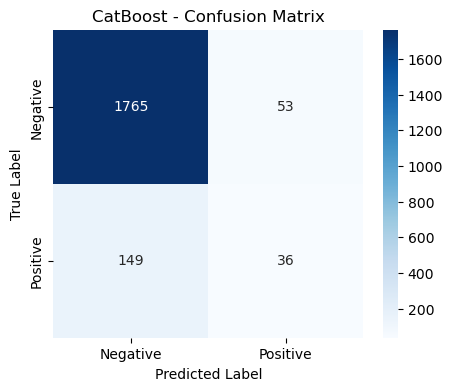


Ensemble model saved as 'WeightedEnsemble.joblib'

Ensemble Model Results
ROC-AUC: 0.826 | Accuracy: 0.909
Precision: 0.882 | Recall: 0.909 | F1-score: 0.885
              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95      1818
         1.0       0.52      0.15      0.23       185

    accuracy                           0.91      2003
   macro avg       0.72      0.57      0.59      2003
weighted avg       0.88      0.91      0.89      2003


======================================== FINAL RESULTS ========================================
            model  roc_auc  accuracy  precision   recall  f1-score  train_time  predict_time
Weighted Ensemble 0.825912  0.908637   0.882416 0.908637  0.885187         NaN           NaN
         LightGBM 0.819511  0.907139   0.878092 0.907139  0.881828    5.522279      0.000031
         CatBoost 0.815184  0.899151   0.874341 0.899151  0.882781    7.821693      0.000009
          XGBoost 0.809794  0.902646   0.8732

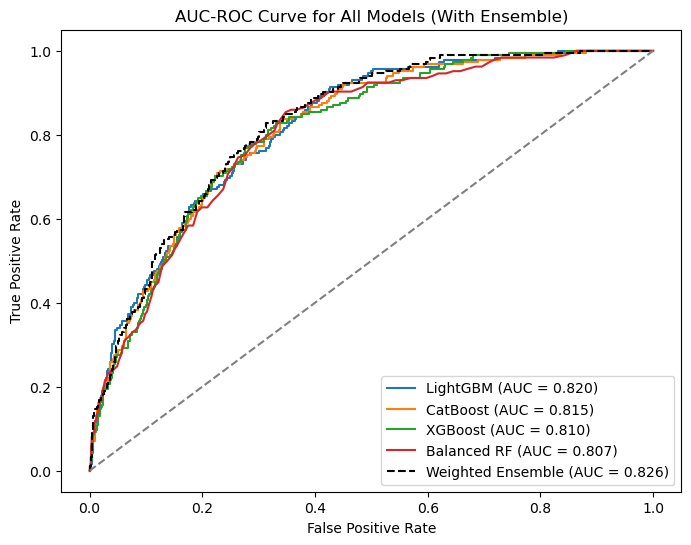

(               model   roc_auc  accuracy  train_time  predict_time  precision  \
 4  Weighted Ensemble  0.825912  0.908637         NaN           NaN   0.882416   
 0           LightGBM  0.819511  0.907139    5.522279      0.000031   0.878092   
 3           CatBoost  0.815184  0.899151    7.821693      0.000009   0.874341   
 2            XGBoost  0.809794  0.902646    4.736510      0.000008   0.873255   
 1        Balanced RF  0.807366  0.907139   39.196540      0.000065   0.880201   
 
      recall  f1-score  support  
 4  0.908637  0.885187      NaN  
 0  0.907139  0.881828   2003.0  
 3  0.899151  0.882781   2003.0  
 2  0.902646  0.881111   2003.0  
 1  0.907139  0.884718   2003.0  ,
 {'LightGBM': LGBMClassifier(colsample_bytree=0.8, force_row_wise=True, learning_rate=0.05,
                 n_estimators=200, objective='binary', subsample=0.8, verbose=-1),
  'Balanced RF': BalancedRandomForestClassifier(n_estimators=200, random_state=42),
  'XGBoost': XGBClassifier(base_score=None

In [153]:
classification_features = (all_features.drop(columns = ['evaluation_date', 'DQ_TARGET'])).columns
classify.run_classification2(classification_features, "DQ_TARGET", all_features)

In [341]:
classification_features = (
    all_features.drop(columns=["evaluation_date", "DQ_TARGET"])
).columns
best_features = classify.get_best_features(classification_features, 'DQ_TARGET', all_features, n_features = 200)

/opt/anaconda3/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning:

invalid value encountered in divide

/opt/anaconda3/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning:

invalid value encountered in divide




Top Features (RandomForestClassifier):
                           Feature  Importance  Correlation
                      credit_score    0.063185    -0.279325
              account_type_SAVINGS    0.037386    -0.110443
                           balance    0.036960    -0.038746
                  OVERDRAFT_median    0.022272    -0.000057
                   OVERDRAFT_count    0.020461     0.075768
                ACCOUNT_FEES_count    0.020385     0.024066
                  ACCOUNT_FEES_std    0.019034     0.011815
               ACCOUNT_FEES_median    0.016110     0.001439
                 SELF_TRANSFER_iqr    0.013826    -0.039885
                       BNPL_median    0.012794     0.012941
                      transactions    0.011057    -0.028498
                     OVERDRAFT_std    0.010351     0.014835
                        BNPL_count    0.009605     0.044866
                          BNPL_std    0.009390     0.040034
                        LOAN_count    0.008567     0.051421



LightGBM Results
ROC-AUC: 0.825 | Accuracy: 0.906
Training Time: 3.4s | Predicting Time: 0.000027s
              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95      1818
         1.0       0.47      0.14      0.22       185

    accuracy                           0.91      2003
   macro avg       0.70      0.56      0.58      2003
weighted avg       0.88      0.91      0.88      2003



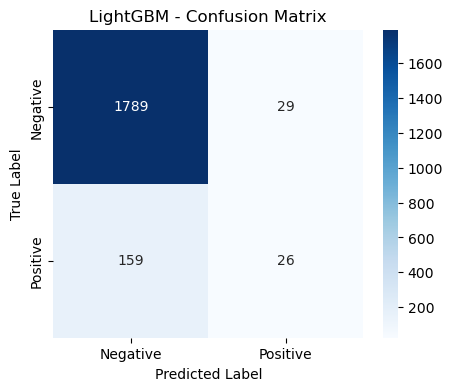


XGBoost Results
ROC-AUC: 0.818 | Accuracy: 0.905
Training Time: 2.5s | Predicting Time: 0.000006s
              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95      1818
         1.0       0.46      0.18      0.26       185

    accuracy                           0.90      2003
   macro avg       0.69      0.58      0.61      2003
weighted avg       0.88      0.90      0.89      2003



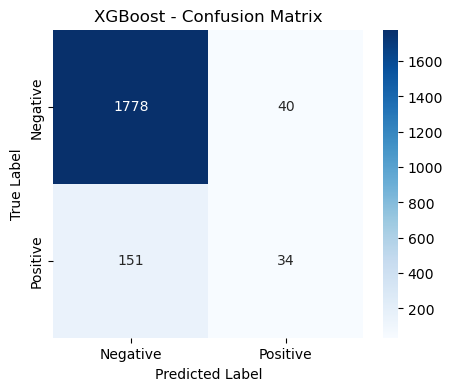


CatBoost Results
ROC-AUC: 0.820 | Accuracy: 0.899
Training Time: 3.2s | Predicting Time: 0.000009s
              precision    recall  f1-score   support

         0.0       0.93      0.97      0.95      1818
         1.0       0.41      0.23      0.30       185

    accuracy                           0.90      2003
   macro avg       0.67      0.60      0.62      2003
weighted avg       0.88      0.90      0.89      2003



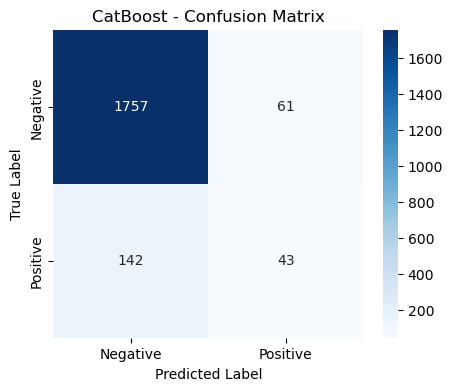


Ensemble model saved as 'WeightedEnsemble.joblib'

Ensemble Model Results
ROC-AUC: 0.826 | Accuracy: 0.906
Precision: 0.880 | Recall: 0.906 | F1-score: 0.886
              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95      1818
         1.0       0.48      0.17      0.25       185

    accuracy                           0.91      2003
   macro avg       0.70      0.58      0.60      2003
weighted avg       0.88      0.91      0.89      2003


======================================== FINAL RESULTS ========================================
            model  roc_auc  accuracy  precision   recall  f1-score  train_time  predict_time
Weighted Ensemble 0.825746  0.906141   0.880022 0.906141  0.885641         NaN           NaN
         LightGBM 0.824984  0.906141   0.877217 0.906141  0.882341    3.352890      0.000027
         CatBoost 0.819633  0.898652   0.877957 0.898652  0.885554    3.177617      0.000009
          XGBoost 0.817643  0.904643   0.8790

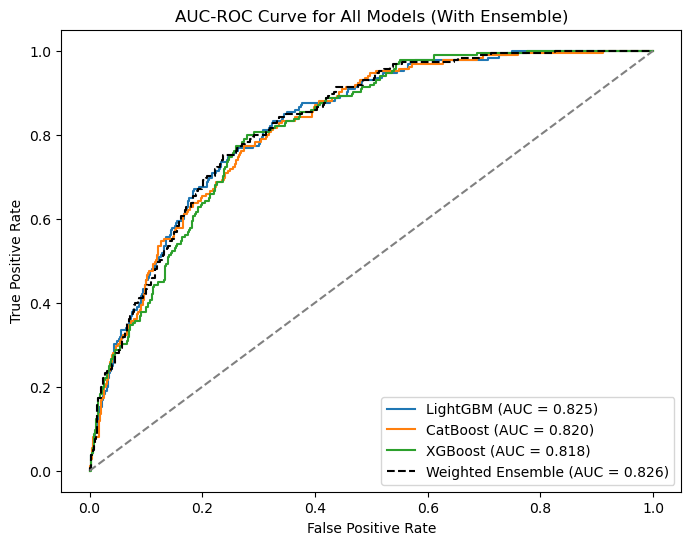

(               model   roc_auc  accuracy  train_time  predict_time  precision  \
 3  Weighted Ensemble  0.825746  0.906141         NaN           NaN   0.880022   
 0           LightGBM  0.824984  0.906141    3.352890      0.000027   0.877217   
 2           CatBoost  0.819633  0.898652    3.177617      0.000009   0.877957   
 1            XGBoost  0.817643  0.904643    2.451192      0.000006   0.879026   
 
      recall  f1-score  support  
 3  0.906141  0.885641      NaN  
 0  0.906141  0.882341   2003.0  
 2  0.898652  0.885554   2003.0  
 1  0.904643  0.885622   2003.0  ,
 {'LightGBM': LGBMClassifier(colsample_bytree=0.8, force_row_wise=True, learning_rate=0.05,
                 n_estimators=200, objective='binary', subsample=0.8, verbose=-1),
  'XGBoost': XGBClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=0.8, device=None, early_stopping_rounds=None,
                enable_cat

In [351]:
classify.run_classification2(best_features[0][:100], "DQ_TARGET", all_features)


LightGBM Results
ROC-AUC: 0.820 | Accuracy: 0.904
Training Time: 3.9s | Predicting Time: 0.000022s
              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95      1818
         1.0       0.42      0.12      0.19       185

    accuracy                           0.90      2003
   macro avg       0.67      0.55      0.57      2003
weighted avg       0.87      0.90      0.88      2003



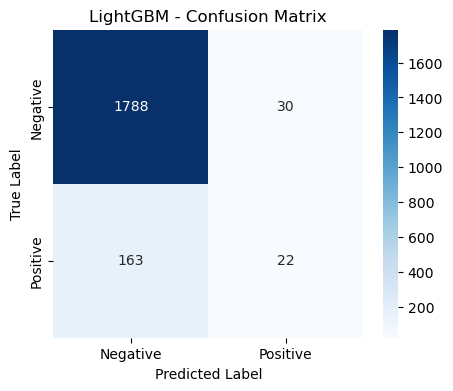


XGBoost Results
ROC-AUC: 0.812 | Accuracy: 0.905
Training Time: 3.9s | Predicting Time: 0.000008s
              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95      1818
         1.0       0.45      0.16      0.24       185

    accuracy                           0.90      2003
   macro avg       0.69      0.57      0.59      2003
weighted avg       0.88      0.90      0.88      2003



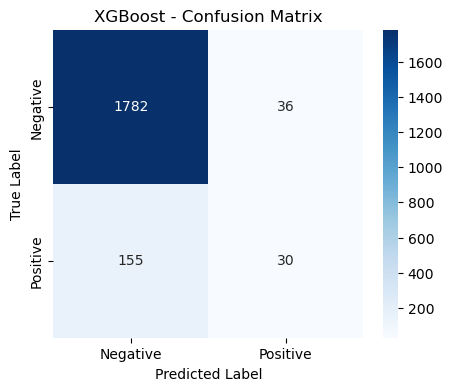


CatBoost Results
ROC-AUC: 0.821 | Accuracy: 0.896
Training Time: 6.0s | Predicting Time: 0.000008s
              precision    recall  f1-score   support

         0.0       0.92      0.97      0.94      1818
         1.0       0.37      0.18      0.25       185

    accuracy                           0.90      2003
   macro avg       0.65      0.58      0.59      2003
weighted avg       0.87      0.90      0.88      2003



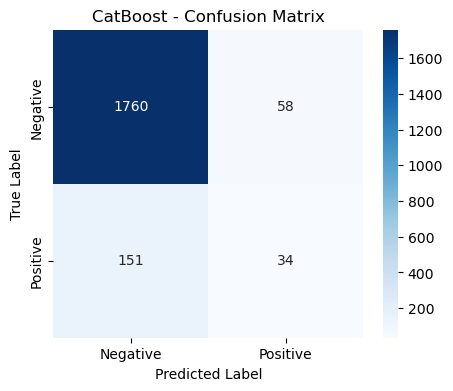


Ensemble model saved as 'WeightedEnsemble.joblib'

Ensemble Model Results
ROC-AUC: 0.824 | Accuracy: 0.906
Precision: 0.877 | Recall: 0.906 | F1-score: 0.882
              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95      1818
         1.0       0.47      0.14      0.22       185

    accuracy                           0.91      2003
   macro avg       0.70      0.56      0.58      2003
weighted avg       0.88      0.91      0.88      2003


======================================== FINAL RESULTS ========================================
            model  roc_auc  accuracy  precision   recall  f1-score  train_time  predict_time
Weighted Ensemble 0.823840  0.906141   0.877217 0.906141  0.882341         NaN           NaN
         CatBoost 0.820968  0.895657   0.870054 0.895657  0.879442    5.985459      0.000008
         LightGBM 0.820483  0.903645   0.870884 0.903645  0.878308    3.905457      0.000022
          XGBoost 0.812422  0.904643   0.8769

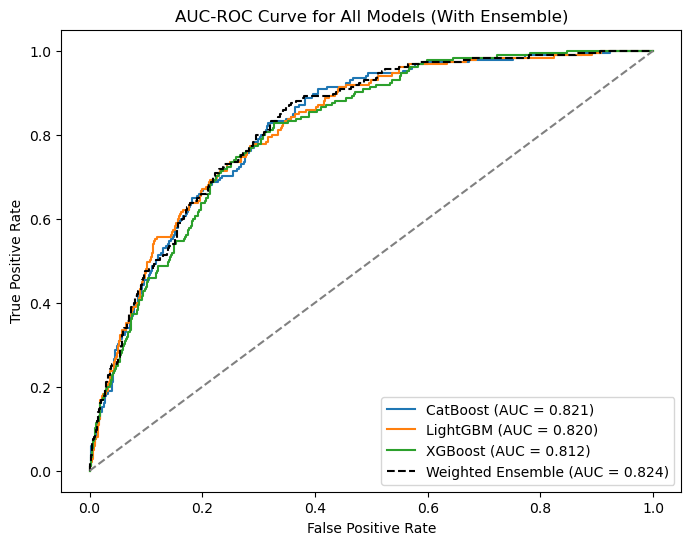

(               model   roc_auc  accuracy  train_time  predict_time  precision  \
 3  Weighted Ensemble  0.823840  0.906141         NaN           NaN   0.877217   
 2           CatBoost  0.820968  0.895657    5.985459      0.000008   0.870054   
 0           LightGBM  0.820483  0.903645    3.905457      0.000022   0.870884   
 1            XGBoost  0.812422  0.904643    3.900060      0.000008   0.876991   
 
      recall  f1-score  support  
 3  0.906141  0.882341      NaN  
 2  0.895657  0.879442   2003.0  
 0  0.903645  0.878308   2003.0  
 1  0.904643  0.883549   2003.0  ,
 {'LightGBM': LGBMClassifier(colsample_bytree=0.8, force_row_wise=True, learning_rate=0.05,
                 n_estimators=200, objective='binary', subsample=0.8, verbose=-1),
  'XGBoost': XGBClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=0.8, device=None, early_stopping_rounds=None,
                enable_cat

In [350]:
classify.run_classification2(best_features[2][:200], "DQ_TARGET", all_features)

In [352]:
categories, consumer, acct, transactions = features.get_datasets()
consumer = consumer[consumer['DQ_TARGET'].isna()]
transactions = transactions[transactions['prism_consumer_id'].isin(consumer['prism_consumer_id'])]
transaction_categories = features.get_transaction_categories(transactions, categories)
all_features = features.one_hot_accounts(acct, consumer)
all_features = features.get_total_transactions(all_features, transaction_categories)
na_features = features.get_categorical_features2(
    all_features, transaction_categories, acct
)
na_features = na_features.set_index('prism_consumer_id')

In [353]:
na_features

,evaluation_date,credit_score,DQ_TARGET,account_type_401K,account_type_AUTO,account_type_BROKERAGE,account_type_CASH MANAGEMENT,account_type_CD,account_type_CHECKING,account_type_CONSUMER,account_type_CREDIT CARD,account_type_HOME EQUITY,account_type_HSA,account_type_IRA,account_type_LINE OF CREDIT,account_type_LOAN,account_type_MONEY MARKET,account_type_MONEYMARKET,account_type_MORTGAGE,account_type_OTHER,account_type_OVERDRAFT,account_type_PREPAID,account_type_RETIREMENT,account_type_ROTH,account_type_SAVINGS,account_type_STOCK PLAN,account_type_STUDENT,transactions,ACCOUNT_FEES_coef_variation,ATM_CASH_coef_variation,AUTOMOTIVE_coef_variation,AUTO_LOAN_coef_variation,BANKING_CATCH_ALL_coef_variation,BILLS_UTILITIES_coef_variation,BNPL_coef_variation,CORPORATE_PAYMENTS_coef_variation,CREDIT_CARD_PAYMENT_coef_variation,DEBT_coef_variation,DEPOSIT_coef_variation,ENTERTAINMENT_coef_variation,ESSENTIAL_SERVICES_coef_variation,EXTERNAL_TRANSFER_coef_variation,FITNESS_coef_variation,FOOD_AND_BEVERAGES_coef_variation,GAMBLING_coef_variation,GENERAL_MERCHANDISE_coef_variation,GIFTS_DONATIONS_coef_variation,GOVERNMENT_SERVICES_coef_variation,GROCERIES_coef_variation,INSURANCE_coef_variation,INVESTMENT_coef_variation,INVESTMENT_INCOME_coef_variation,LEGAL_coef_variation,LOAN_coef_variation,MISCELLANEOUS_coef_variation,MORTGAGE_coef_variation,OTHER_BENEFITS_coef_variation,OVERDRAFT_coef_variation,PAYCHECK_coef_variation,PETS_coef_variation,REFUND_coef_variation,RENT_coef_variation,RISK_CATCH_ALL_coef_variation,RTO_LTO_coef_variation,SELF_TRANSFER_coef_variation,TAX_coef_variation,TIME_OR_STUFF_coef_variation,TRANSPORATION_coef_variation,TRAVEL_coef_variation,ACCOUNT_FEES_count,ATM_CASH_count,AUTOMOTIVE_count,AUTO_LOAN_count,BANKING_CATCH_ALL_count,BILLS_UTILITIES_count,BNPL_count,CORPORATE_PAYMENTS_count,CREDIT_CARD_PAYMENT_count,DEBT_count,DEPOSIT_count,ENTERTAINMENT_count,ESSENTIAL_SERVICES_count,EXTERNAL_TRANSFER_count,FITNESS_count,FOOD_AND_BEVERAGES_count,GAMBLING_count,GENERAL_MERCHANDISE_count,GIFTS_DONATIONS_count,GOVERNMENT_SERVICES_count,GROCERIES_count,INSURANCE_count,INVESTMENT_count,INVESTMENT_INCOME_count,LEGAL_count,LOAN_count,MISCELLANEOUS_count,MORTGAGE_count,OTHER_BENEFITS_count,OVERDRAFT_count,PAYCHECK_count,PETS_count,REFUND_count,RENT_count,RISK_CATCH_ALL_count,RTO_LTO_count,SELF_TRANSFER_count,TAX_count,TIME_OR_STUFF_count,TRANSPORATION_count,TRAVEL_count,ACCOUNT_FEES_iqr,ATM_CASH_iqr,AUTOMOTIVE_iqr,AUTO_LOAN_iqr,BANKING_CATCH_ALL_iqr,BILLS_UTILITIES_iqr,BNPL_iqr,CORPORATE_PAYMENTS_iqr,CREDIT_CARD_PAYMENT_iqr,DEBT_iqr,DEPOSIT_iqr,ENTERTAINMENT_iqr,ESSENTIAL_SERVICES_iqr,EXTERNAL_TRANSFER_iqr,FITNESS_iqr,FOOD_AND_BEVERAGES_iqr,GAMBLING_iqr,GENERAL_MERCHANDISE_iqr,GIFTS_DONATIONS_iqr,GOVERNMENT_SERVICES_iqr,GROCERIES_iqr,INSURANCE_iqr,INVESTMENT_iqr,INVESTMENT_INCOME_iqr,LEGAL_iqr,LOAN_iqr,MISCELLANEOUS_iqr,MORTGAGE_iqr,OTHER_BENEFITS_iqr,OVERDRAFT_iqr,PAYCHECK_iqr,PETS_iqr,REFUND_iqr,RENT_iqr,RISK_CATCH_ALL_iqr,RTO_LTO_iqr,SELF_TRANSFER_iqr,TAX_iqr,TIME_OR_STUFF_iqr,TRANSPORATION_iqr,TRAVEL_iqr,ACCOUNT_FEES_median,ATM_CASH_median,AUTOMOTIVE_median,AUTO_LOAN_median,BANKING_CATCH_ALL_median,BILLS_UTILITIES_median,BNPL_median,CORPORATE_PAYMENTS_median,CREDIT_CARD_PAYMENT_median,DEBT_median,DEPOSIT_median,ENTERTAINMENT_median,ESSENTIAL_SERVICES_median,EXTERNAL_TRANSFER_median,FITNESS_median,FOOD_AND_BEVERAGES_median,GAMBLING_median,GENERAL_MERCHANDISE_median,GIFTS_DONATIONS_median,GOVERNMENT_SERVICES_median,GROCERIES_median,INSURANCE_median,INVESTMENT_median,INVESTMENT_INCOME_median,LEGAL_median,LOAN_median,MISCELLANEOUS_median,MORTGAGE_median,OTHER_BENEFITS_median,OVERDRAFT_median,PAYCHECK_median,PETS_median,REFUND_median,RENT_median,RISK_CATCH_ALL_median,RTO_LTO_median,SELF_TRANSFER_median,TAX_median,TIME_OR_STUFF_median,TRANSPORATION_median,TRAVEL_median,ACCOUNT_FEES_skewness,ATM_CASH_skewness,AUTOMOTIVE_skewness,AUTO_LOAN_skewness,BANKING_CATCH_ALL_skewness,BILLS_UTILITIES_skewness,BNPL_skewness,CORPORATE_PAYMENTS_s

/opt/anaconda3/lib/python3.12/site-packages/shap/explainers/_tree.py:448: UserWarning:

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray

/opt/anaconda3/lib/python3.12/site-packages/shap/plots/_beeswarm.py:941: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



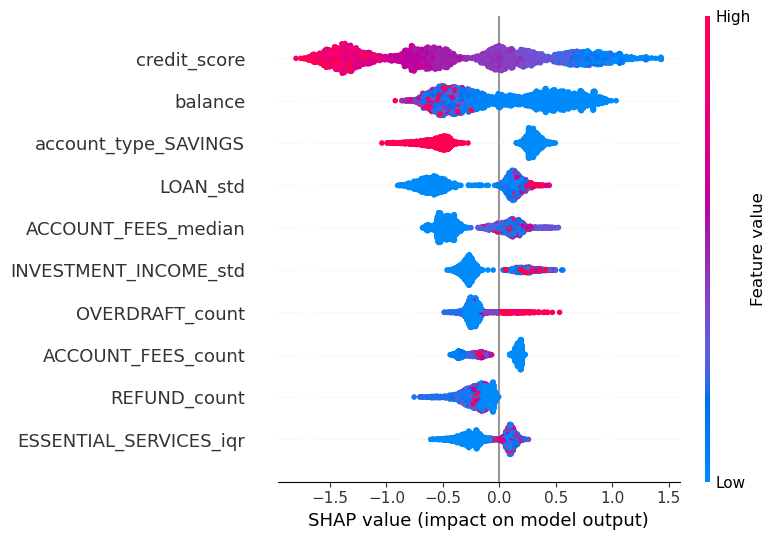

/Users/kevinwong/Library/CloudStorage/GoogleDrive-kew024@ucsd.edu/My Drive/UCSD Winter Quarter 2025/dsc180b/dsc180b-capstone-q2/src/base/classify.py:145: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/Users/kevinwong/Library/CloudStorage/GoogleDrive-kew024@ucsd.edu/My Drive/UCSD Winter Quarter 2025/dsc180b/dsc180b-capstone-q2/src/base/classify.py:153: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



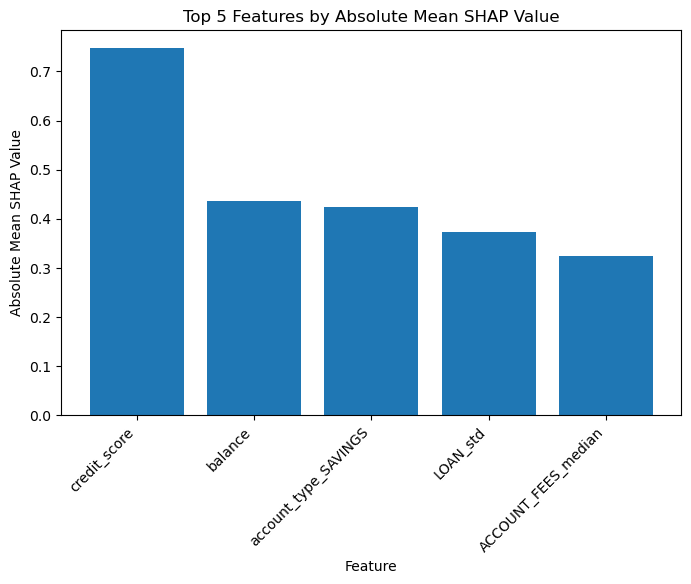

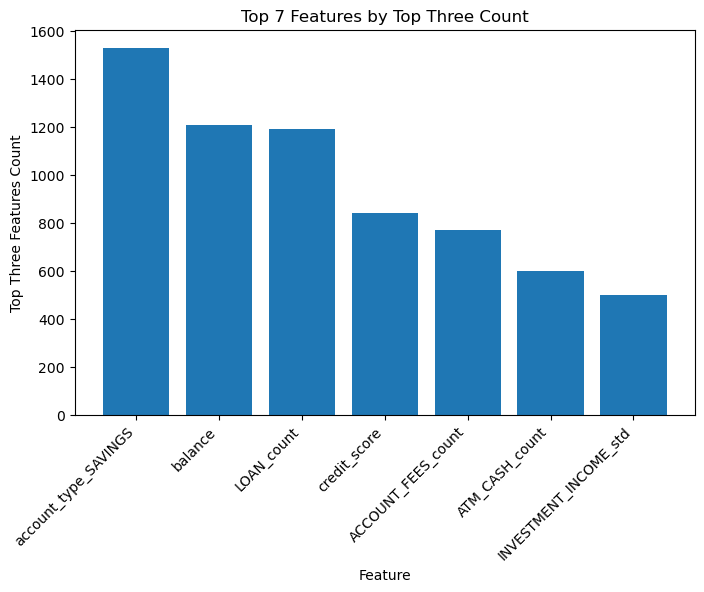

In [354]:
info = classify.individual_test(best_features[0][:100], "LightGBM", na_features)

In [355]:
info

,probability,top_1_feature,top_1_score,top_2_feature,top_2_score,top_3_feature,top_3_score
prism_consumer_id,,,,,,,
4000,4,LOAN_std,0.280147,ATM_CASH_count,0.233585,ACCOUNT_FEES_count,0.186882
4001,23,LOAN_count,0.240234,ACCOUNT_FEES_count,0.158574,GENERAL_MERCHANDISE_count,0.105805
4002,7,DEPOSIT_std,0.229104,ACCOUNT_FEES_count,0.182946,ESSENTIAL_SERVICES_count,0.136711
4003,47,ATM_CASH_count,0.233068,LOAN_count,0.216743,ACCOUNT_FEES_count,0.186185
4004,3,ATM_CASH_count,0.232094,LOAN_count,0.221147,ACCOUNT_FEES_count,0.188890
...,...,...,...,...,...,...,...
14995,133,balance,0.580293,account_type_SAVINGS,0.337325,ACCOUNT_FEES_count,0.165378
14996,18,INVESTMENT_INCOME_std,0.303785,ACCOUNT_FEES_median,0.204365,LOAN_count,0.195207
14997,141,balance,0.663150,account_type_SAVINGS,0.395983,LOAN_std,0.353220


In [356]:
final_preds = info.reset_index()[['prism_consumer_id', 'probability']]
final_preds = final_preds.rename(columns = {'probability': 'prediction'})
final_preds.to_csv('ucsd-consDF.csv', index = False)

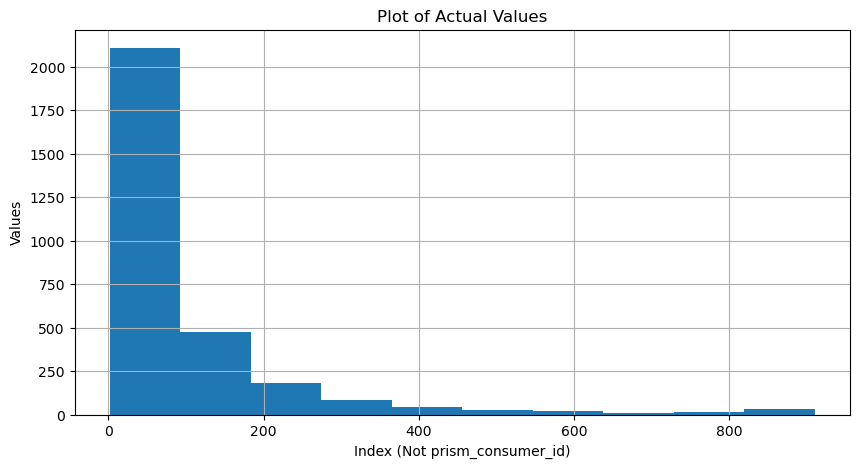

In [332]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.hist(list(info['probability']))

# Labels and title
plt.xlabel("Index (Not prism_consumer_id)")
plt.ylabel("Values")
plt.title("Plot of Actual Values")
plt.grid(True)

In [205]:
info[info['probability'] < 500].shape[0]

2484

In [333]:
info

,probability,top_1_feature,top_1_score,top_2_feature,top_2_score,top_3_feature,top_3_score
prism_consumer_id,,,,,,,
4000,5,ATM_CASH_count,0.197096,ESSENTIAL_SERVICES_count,0.152379,ACCOUNT_FEES_count,0.140193
4001,30,LOAN_count,0.161585,REFUND_mean,0.129386,ACCOUNT_FEES_count,0.117561
4002,5,REFUND_skewness,0.161330,ESSENTIAL_SERVICES_count,0.148610,ACCOUNT_FEES_count,0.121736
4003,36,BANKING_CATCH_ALL_coef_variation,0.265769,ATM_CASH_count,0.206496,ESSENTIAL_SERVICES_count,0.164008
4004,3,ATM_CASH_count,0.206104,LOAN_count,0.145255,ACCOUNT_FEES_count,0.121508
...,...,...,...,...,...,...,...
14995,230,balance,0.474529,account_type_SAVINGS,0.424305,BNPL_mean,0.173496
14996,26,INVESTMENT_INCOME_std,0.285441,BANKING_CATCH_ALL_coef_variation,0.222544,ACCOUNT_FEES_median,0.222124
14997,82,balance,0.482480,account_type_SAVINGS,0.325705,ESSENTIAL_SERVICES_count,0.167627
